<a href="https://colab.research.google.com/github/antoniogss/air_quality/blob/main/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook imports and packages

In [2]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files #Upload files into the notebook
from glob import glob
from datetime import date, time, datetime, timedelta
from functools import reduce
from matplotlib import dates, rcParams

war.filterwarnings('ignore')

#Google Drive connection

In [3]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )
gc.output.clear()

#Setting up the working directory

In [4]:
%cd ./gdrive/MyDrive/air_quality/datasets/created_datasets/

/content/gdrive/MyDrive/air_quality/datasets/created_datasets


#Load the csv file into a DF

In [5]:
df = pd.read_csv('df.csv')
df.drop('Unnamed: 0', axis=1,inplace=True)
# df.head()

#Mapping of NaN values

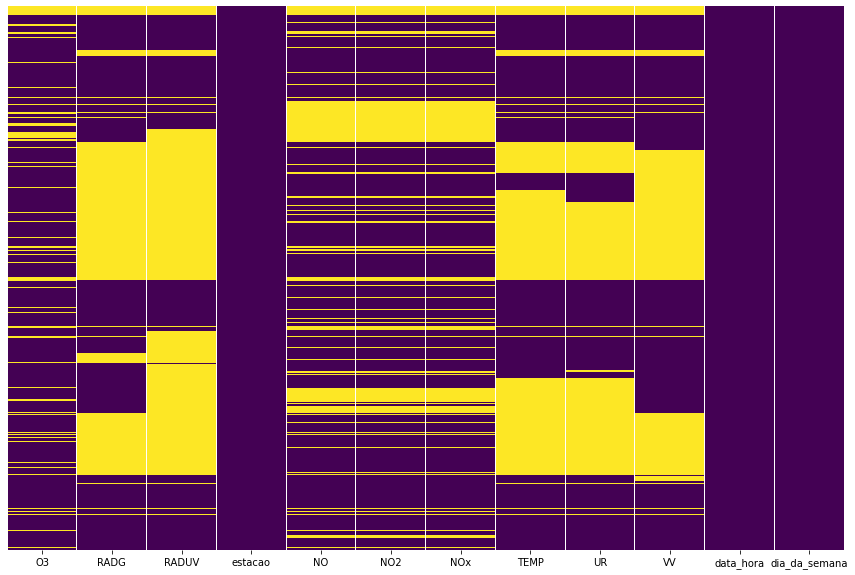

In [6]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            ax=ax
          );

#Percentage of NaN values 

In [7]:
#O3
print(round((df['O3'].isna().sum() / len(df['O3']))*100),'%')

14 %


In [8]:
#NO
print(round((df['NO'].isna().sum() / len(df['NO']))*100),'%')

25 %


In [9]:
#NO2
print(round((df['NO2'].isna().sum() / len(df['NO2']))*100),'%')

25 %


#Counts of unique rows

In [10]:
df['estacao'].value_counts()
# df['estacao'].value_counts(normalize=True)

Capão Redondo          87672
Ibirapuera             87672
Interlagos             87672
Parque Dom Pedro II    87672
Name: estacao, dtype: int64

#DFs by estation

##Hourly

###Capão Redondo

In [11]:
filt = df['estacao'] == 'Capão Redondo'
cp_hour = df.loc[filt]
cp_hour['data_hora'] = pd.to_datetime(df['data_hora'])
# cp_hour.head()

###Ibirapuera

In [12]:
filt = df['estacao'] == 'Ibirapuera'
ib_hour = df.loc[filt]
ib_hour['data_hora'] = pd.to_datetime(df['data_hora'])
# ib_hour.head()

###Interlagos

In [13]:
filt = df['estacao'] == 'Interlagos'
inter_hour = df.loc[filt]
inter_hour['data_hora'] = pd.to_datetime(df['data_hora'])
# inter_hour.head()

###Parque Dom Pedro II

In [36]:
filt = df['estacao'] == 'Parque Dom Pedro II'
pq_hour = df.loc[filt]
pq_hour['data_hora'] = pd.to_datetime(df['data_hora'])
# pq_hour.head()

##Daily

In [15]:
cols = {'O3' : 'mean', 
        'NO' : 'mean',
        'NO2' : 'mean'}

dias_ptbr = {'Sunday':'Domingo', 
             'Monday':'Segunda-feira', 
             'Tuesday':'Terça-feira', 
             'Wednesday':'Quarta-feira', 
             'Thursday':'Quinta-feira', 
             'Friday':'Sexta-feira', 
             'Saturday':'Sábado'}

###Capão Redondo

In [16]:
filt = df['estacao'] == 'Capão Redondo'
cp_day = df.loc[filt]
cp_day['data_hora'] = pd.to_datetime(df['data_hora'])
cp_day.set_index('data_hora', inplace = True)
cp_day = cp_day.resample('D').agg(cols)
cp_day.reset_index(inplace=True)
# cp_day.head()

###Ibirapuera

In [17]:
filt = df['estacao'] == 'Ibirapuera'
ib_day = df.loc[filt]
ib_day['data_hora'] = pd.to_datetime(df['data_hora'])
ib_day.set_index('data_hora', inplace = True)
ib_day = ib_day.resample('D').agg(cols)
ib_day.reset_index(inplace=True)
ib_day['dia_da_semana'] = ib_day['data_hora'].dt.day_name().replace(dias_ptbr)
# ib_day.head()

###Interlagos

In [18]:
filt = df['estacao'] == 'Interlagos'
inter_day = df.loc[filt]
inter_day['data_hora'] = pd.to_datetime(df['data_hora'])
inter_day.set_index('data_hora', inplace = True)
inter_day = inter_day.resample('D').agg(cols)
inter_day.reset_index(inplace=True)
inter_day['dia_da_semana'] = inter_day['data_hora'].dt.day_name().replace(dias_ptbr)
# inter_day.head()

###Parque Dom Pedro II

In [34]:
filt = df['estacao'] == 'Parque Dom Pedro II'
pq_day = df.loc[filt]
pq_day['data_hora'] = pd.to_datetime(df['data_hora'])
pq_day.set_index('data_hora', inplace = True)
pq_day = pq_day.resample('D').agg(cols)
pq_day.reset_index(inplace=True)
pq_day['dia_da_semana'] = pq_day['data_hora'].dt.day_name().replace(dias_ptbr)
# pq_day.head()

##Monthly

In [20]:
mes_ptbr = {'January':'Janeiro', 
             'February':'Fevereiro', 
             'March':'Março', 
             'April':'Abril', 
             'May':'Maio', 
             'June':'Junho', 
             'July':'Julho',
             'August':'Agosto', 
             'September':'Setembro',
             'October':'Outubro', 
             'November':'Novembro',
             'December':'Dezembro'}

###Capão Redondo

In [21]:
filt = df['estacao'] == 'Capão Redondo'
cp_month = df.loc[filt]
cp_month['data_hora'] = pd.to_datetime(df['data_hora'])
cp_month.set_index('data_hora', inplace = True)
cp_month = cp_month.resample('M').agg(cols)
cp_month.reset_index(inplace=True)
cp_month['mes'] = cp_month['data_hora'].dt.month_name().replace(mes_ptbr)
# cp_month.head()

###Ibirapuera

In [22]:
filt = df['estacao'] == 'Ibirapuera'
ib_month = df.loc[filt]
ib_month['data_hora'] = pd.to_datetime(df['data_hora'])
ib_month.set_index('data_hora', inplace = True)
ib_month = ib_month.resample('M').agg(cols)
ib_month.reset_index(inplace=True)
ib_month['mes'] = ib_month['data_hora'].dt.month_name().replace(dias_ptbr)
# ib_month.head()

###Interlagos

In [23]:
filt = df['estacao'] == 'Interlagos'
inter_month = df.loc[filt]
inter_month['data_hora'] = pd.to_datetime(df['data_hora'])
inter_month.set_index('data_hora', inplace = True)
inter_month = inter_month.resample('M').agg(cols)
inter_month.reset_index(inplace=True)
inter_month['mes'] = inter_month['data_hora'].dt.month_name().replace(dias_ptbr)
# inter_month.head()

###Parque Dom Pedro II

In [56]:
filt = df['estacao'] == 'Parque Dom Pedro II'
pq_month = df.loc[filt]
pq_month['data_hora'] = pd.to_datetime(df['data_hora'])
pq_month.set_index('data_hora', inplace = True)
pq_month = pq_month.resample('M').agg(cols)
pq_month.reset_index(inplace=True)
pq_month['mes'] = pq_month['data_hora'].dt.month_name().replace(dias_ptbr)
# pd_month.head()

##Yearly

###Capão Redondo

In [25]:
filt = df['estacao'] == 'Capão Redondo'
cp_year = df.loc[filt]
cp_year['data_hora'] = pd.to_datetime(df['data_hora'])
cp_year.set_index('data_hora', inplace = True)
cp_year = cp_year.resample('A').agg(cols)
cp_year.reset_index(inplace=True)
# cp_year.head()

###Ibirapuera

In [26]:
filt = df['estacao'] == 'Ibirapuera'
ib_year = df.loc[filt]
ib_year['data_hora'] = pd.to_datetime(df['data_hora'])
ib_year.set_index('data_hora', inplace = True)
ib_year = ib_year.resample('A').agg(cols)
ib_year.reset_index(inplace=True)
# ib_year.head()

###Interlagos

In [27]:
filt = df['estacao'] == 'Interlagos'
inter_year = df.loc[filt]
inter_year['data_hora'] = pd.to_datetime(df['data_hora'])
inter_year.set_index('data_hora', inplace = True)
inter_year = inter_year.resample('A').agg(cols)
inter_year.reset_index(inplace=True)
# inter_year.head()

###Parque Dom Pedro II

In [60]:
filt = df['estacao'] == 'Parque Dom Pedro II'
pq_year = df.loc[filt]
pq_year['data_hora'] = pd.to_datetime(df['data_hora'])
pq_year.set_index('data_hora', inplace = True)
pq_year = pq_year.resample('A').agg(cols)
pq_year.reset_index(inplace=True)
# pd_year.head()

#Data Analysis

#Graphs

##Hourly Concentratiom

###O3

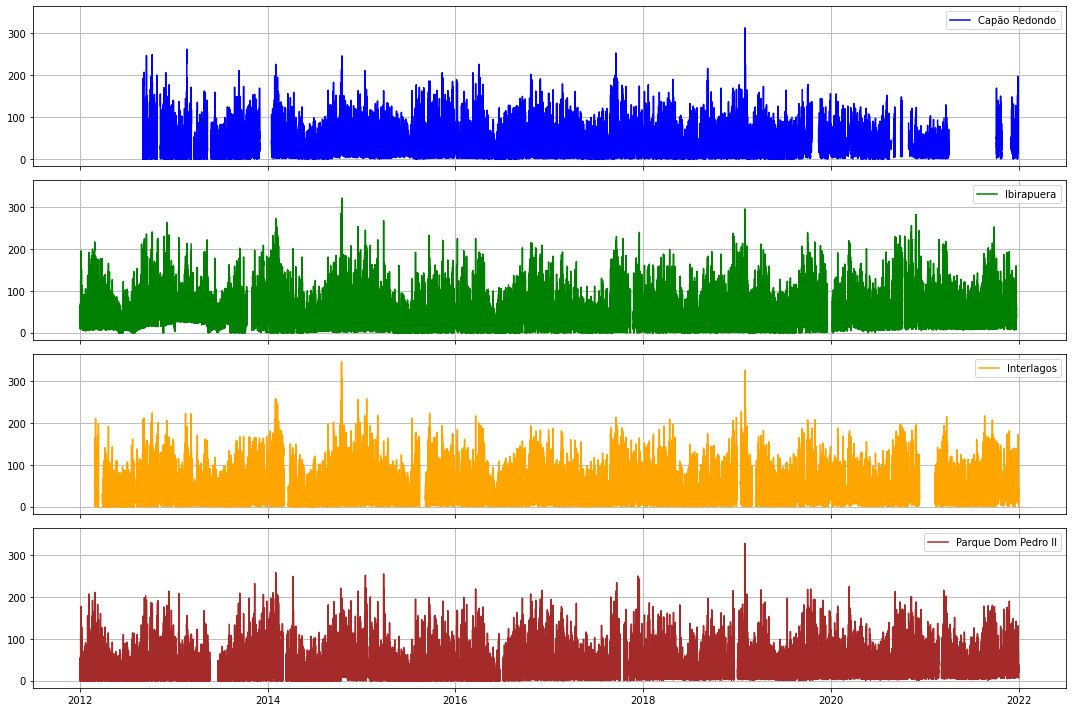

In [43]:
x_cp_hour = cp_hour['data_hora']
x_ib_hour = ib_hour['data_hora']
x_inter_hour = inter_hour['data_hora']
x_pq_hour = pq_hour['data_hora']

y_cp_hour_o3 = cp_hour['O3']
y_ib_hour_o3 = ib_hour['O3']
y_inter_hour_o3 = inter_hour['O3']
y_pq_hour_o3 = pq_hour['O3']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

ax1.plot(x_cp_hour, y_cp_hour_o3, label='Capão Redondo', color='blue')
ax2.plot(x_ib_hour, y_ib_hour_o3, label='Ibirapuera', color='green')
ax3.plot(x_inter_hour, y_inter_hour_o3, label='Interlagos', color='orange')
ax4.plot(x_pq_hour, y_pq_hour_o3, label='Parque Dom Pedro II', color='brown')

ax1.legend()
ax1.set_title('')
# ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(True)

ax2.legend()
# ax2.set_title('')
# ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(True)

ax3.legend()
# ax3.set_title('')
# ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True)

ax4.legend()
# ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(True)

plt.tight_layout()
plt.show()

###NO

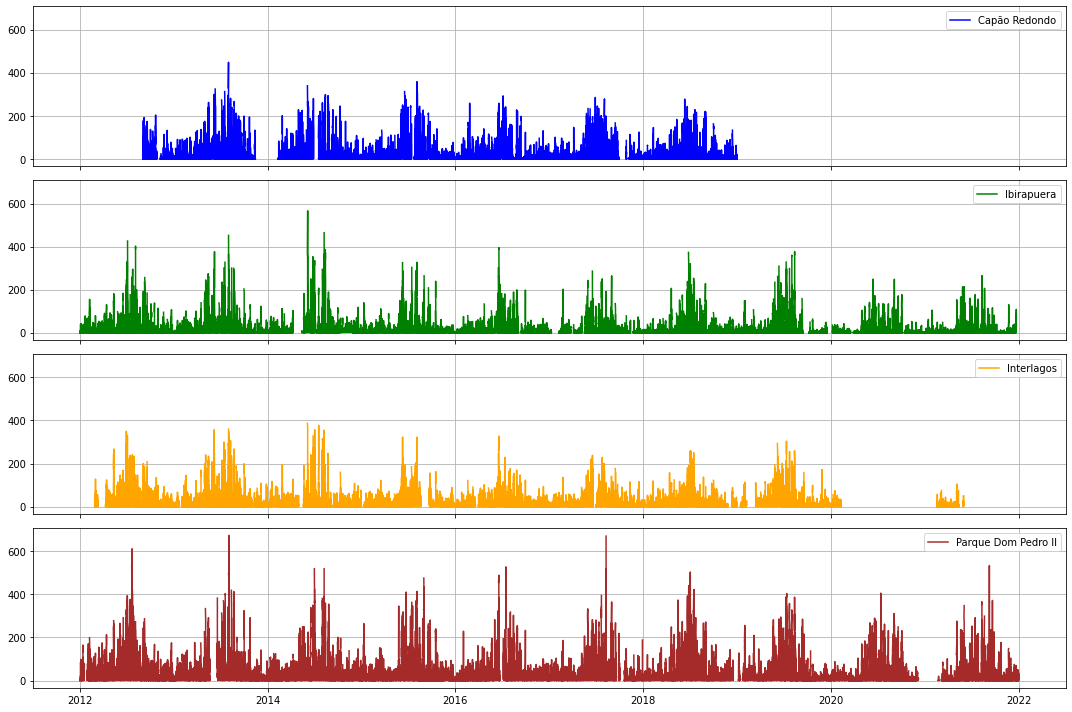

In [44]:
x_cp_hour = cp_hour['data_hora']
x_ib_hour = ib_hour['data_hora']
x_inter_hour = inter_hour['data_hora']
x_pq_hour = pq_hour['data_hora']

y_cp_hour_no = cp_hour['NO']
y_ib_hour_no = ib_hour['NO']
y_inter_hour_no = inter_hour['NO']
y_pq_hour_no = pq_hour['NO']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

ax1.plot(x_cp_hour, y_cp_hour_no, label='Capão Redondo', color='blue')
ax2.plot(x_ib_hour, y_ib_hour_no, label='Ibirapuera', color='green')
ax3.plot(x_inter_hour, y_inter_hour_no, label='Interlagos', color='orange')
ax4.plot(x_pq_hour, y_pq_hour_no, label='Parque Dom Pedro II', color='brown')

ax1.legend()
ax1.set_title('')
# ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(True)

ax2.legend()
# ax2.set_title('')
# ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(True)

ax3.legend()
# ax3.set_title('')
# ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True)

ax4.legend()
# ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(True)

plt.tight_layout()
plt.show()

###NO2

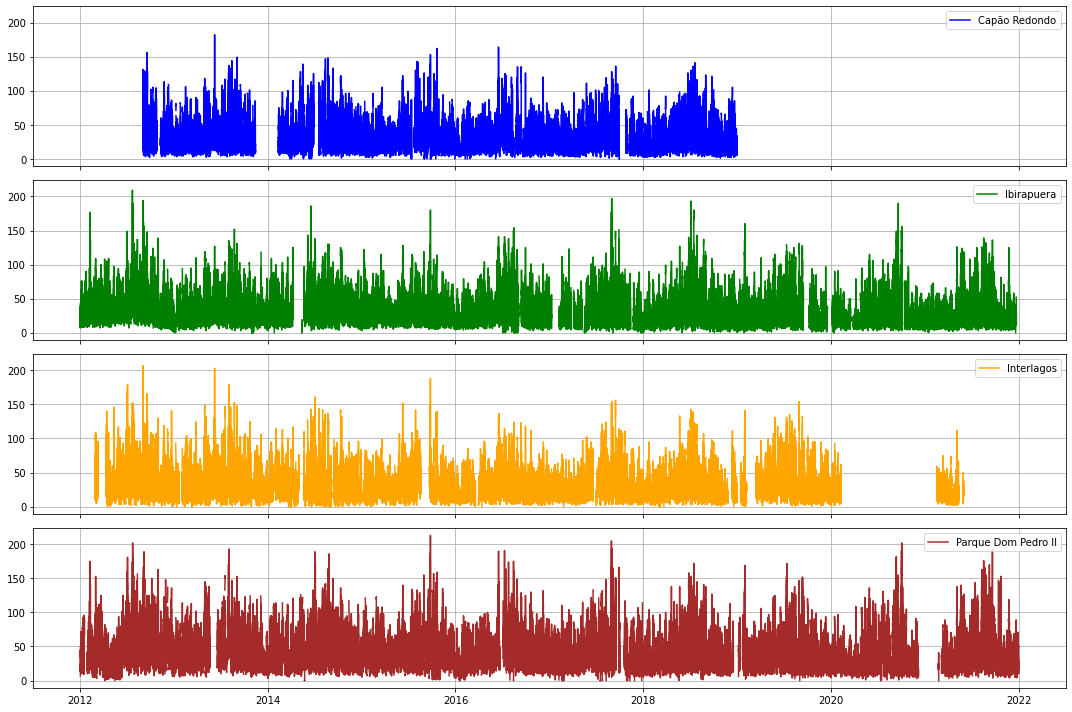

In [45]:
x_cp_hour = cp_hour['data_hora']
x_ib_hour = ib_hour['data_hora']
x_inter_hour = inter_hour['data_hora']
x_pq_hour = pq_hour['data_hora']

y_cp_hour_no2 = cp_hour['NO2']
y_ib_hour_no2 = ib_hour['NO2']
y_inter_hour_no2 = inter_hour['NO2']
y_pq_hour_no2 = pq_hour['NO2']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

ax1.plot(x_cp_hour, y_cp_hour_no2, label='Capão Redondo', color='blue')
ax2.plot(x_ib_hour, y_ib_hour_no2, label='Ibirapuera', color='green')
ax3.plot(x_inter_hour, y_inter_hour_no2, label='Interlagos', color='orange')
ax4.plot(x_pq_hour, y_pq_hour_no2, label='Parque Dom Pedro II', color='brown')

ax1.legend()
ax1.set_title('')
# ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(True)

ax2.legend()
# ax2.set_title('')
# ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(True)

ax3.legend()
# ax3.set_title('')
# ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True)

ax4.legend()
# ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(True)

plt.tight_layout()
plt.show()

##Daily Mean Concentration

###O3

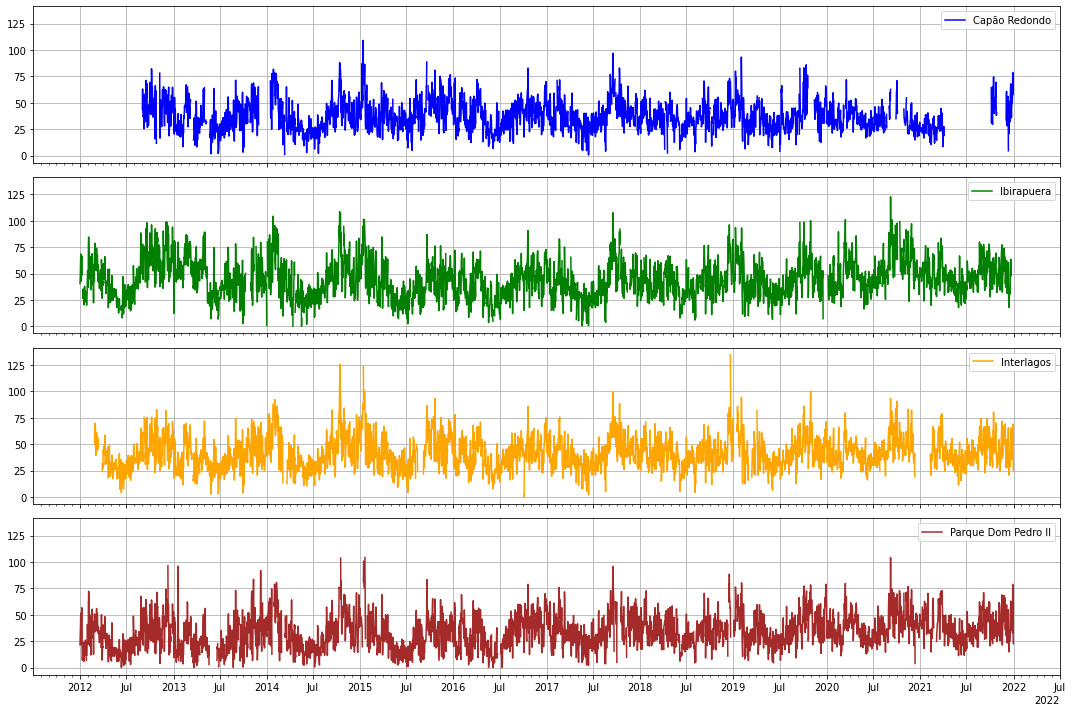

In [53]:
x_cp_day = cp_day['data_hora']
x_ib_day = ib_day['data_hora']
x_inter_day = inter_day['data_hora']
x_pq_day = pq_day['data_hora']

y_cp_day_o3 = cp_day['O3']
y_ib_day_o3 = ib_day['O3']
y_inter_day_o3 = inter_day['O3']
y_pq_day_o3 = pq_day['O3']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

####

ax1.plot(x_cp_day, y_cp_day_o3, label='Capão Redondo', color='blue')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x_ib_day, y_ib_day_o3, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x_inter_day, y_inter_day_o3, label='Interlagos', color='orange')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x_pq_day, y_pq_day_o3, label='Parque Dom Pedro II', color='brown')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax4.set_xlabel('')

plt.tight_layout()
plt.show()

###NO

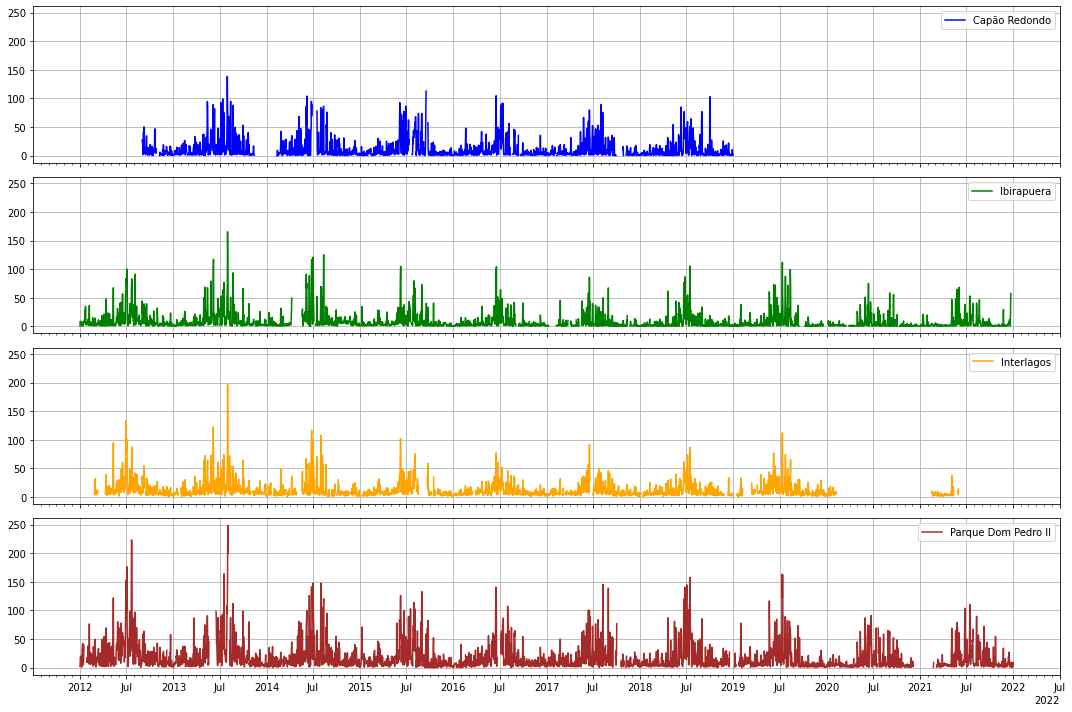

In [54]:
x_cp_day = cp_day['data_hora']
x_ib_day = ib_day['data_hora']
x_inter_day = inter_day['data_hora']
x_pq_day = pq_day['data_hora']

y_cp_day_no = cp_day['NO']
y_ib_day_no = ib_day['NO']
y_inter_day_no = inter_day['NO']
y_pq_day_no = pq_day['NO']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

####

ax1.plot(x_cp_day, y_cp_day_no, label='Capão Redondo', color='blue')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x_ib_day, y_ib_day_no, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x_inter_day, y_inter_day_no, label='Interlagos', color='orange')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x_pq_day, y_pq_day_no, label='Parque Dom Pedro II', color='brown')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax4.set_xlabel('')

plt.tight_layout()
plt.show()

###NO2

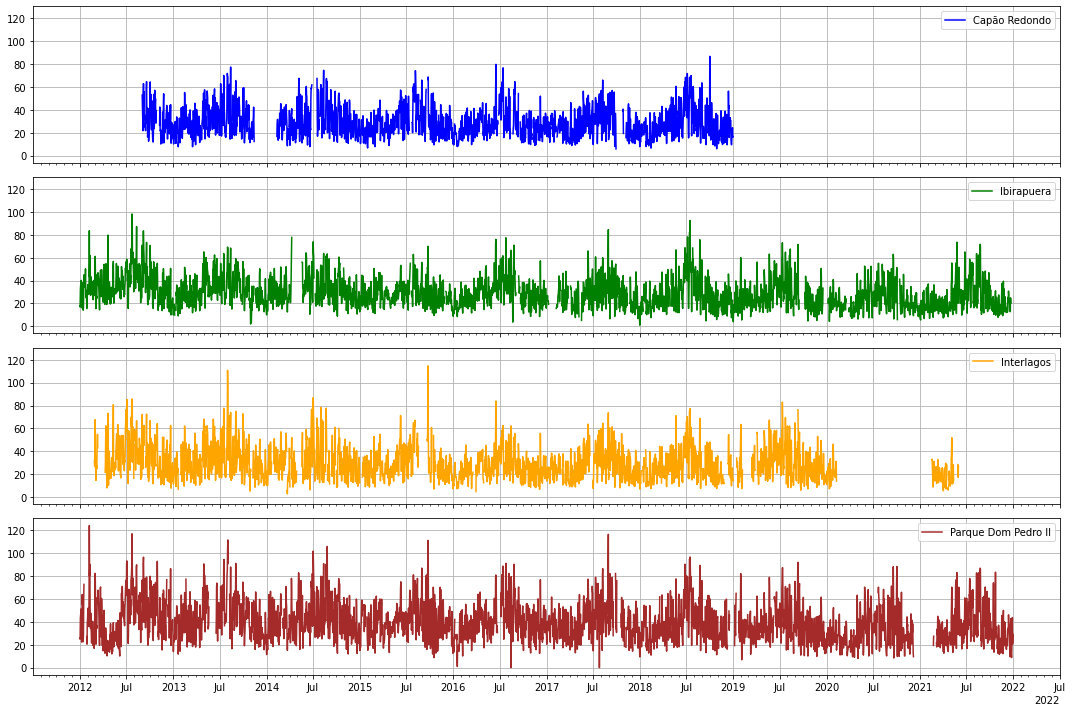

In [55]:
x_cp_day = cp_day['data_hora']
x_ib_day = ib_day['data_hora']
x_inter_day = inter_day['data_hora']
x_pq_day = pq_day['data_hora']

y_cp_day_no2 = cp_day['NO2']
y_ib_day_no2 = ib_day['NO2']
y_inter_day_no2 = inter_day['NO2']
y_pq_day_no2 = pq_day['NO2']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

####

ax1.plot(x_cp_day, y_cp_day_no2, label='Capão Redondo', color='blue')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x_ib_day, y_ib_day_no2, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x_inter_day, y_inter_day_no2, label='Interlagos', color='orange')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x_pq_day, y_pq_day_no2, label='Parque Dom Pedro II', color='brown')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax4.set_xlabel('')

plt.tight_layout()
plt.show()

##Monthly Mean Concentration

###O3

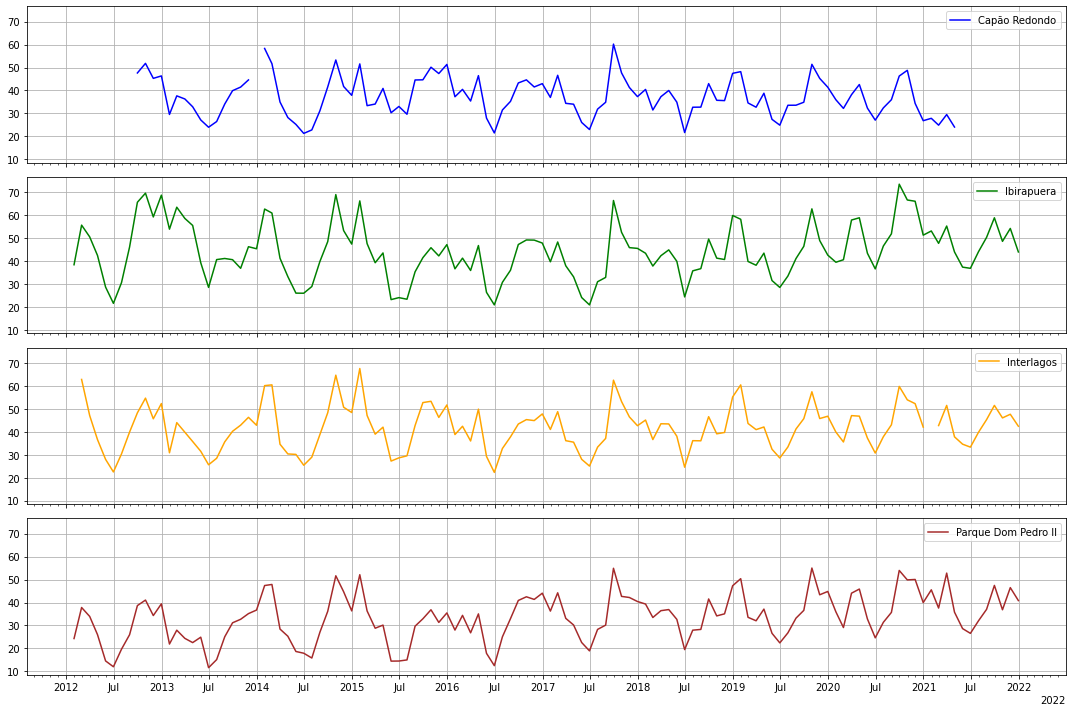

In [57]:
x_cp_month = cp_month['data_hora']
x_ib_month = ib_month['data_hora']
x_inter_month = inter_month['data_hora']
x_pq_month = pq_month['data_hora']

y_cp_month_o3 = cp_month['O3']
y_ib_month_o3 = ib_month['O3']
y_inter_month_o3 = inter_month['O3']
y_pq_month_o3 = pq_month['O3']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

####

ax1.plot(x_cp_month, y_cp_month_o3, label='Capão Redondo', color='blue')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x_ib_month, y_ib_month_o3, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x_inter_month, y_inter_month_o3, label='Interlagos', color='orange')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x_pq_month, y_pq_month_o3, label='Parque Dom Pedro II', color='brown')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax4.set_xlabel('')

plt.tight_layout()
plt.show()

###NO

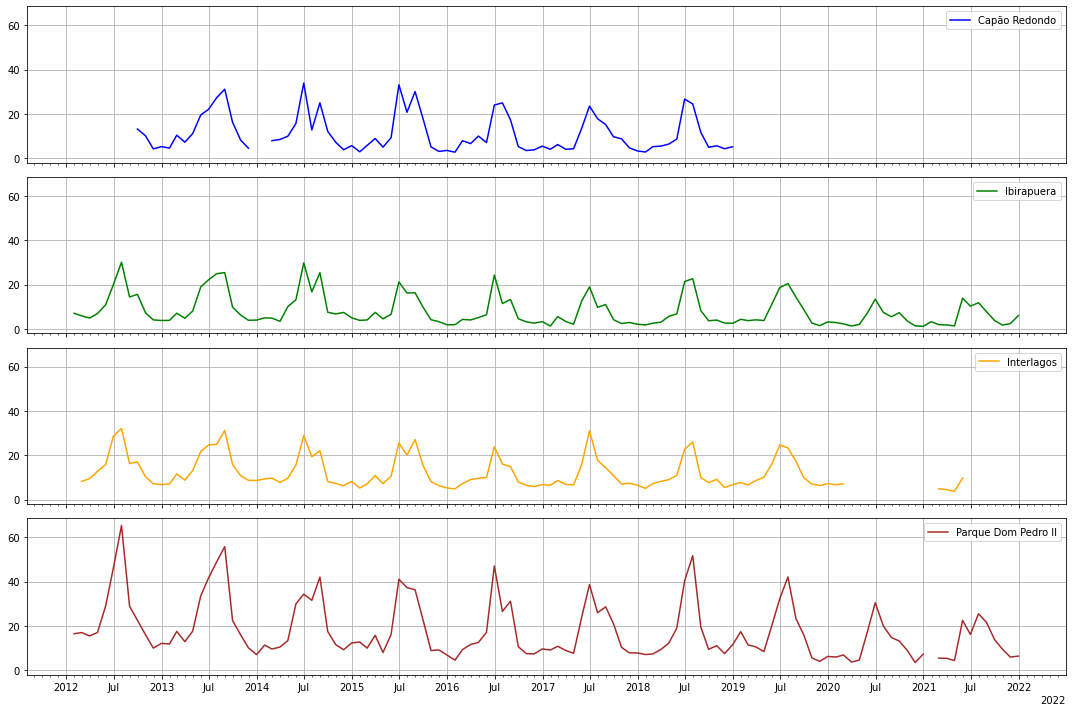

In [58]:
x_cp_month = cp_month['data_hora']
x_ib_month = ib_month['data_hora']
x_inter_month = inter_month['data_hora']
x_pq_month = pq_month['data_hora']

y_cp_month_no = cp_month['NO']
y_ib_month_no = ib_month['NO']
y_inter_month_no = inter_month['NO']
y_pq_month_no = pq_month['NO']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

####

ax1.plot(x_cp_month, y_cp_month_no, label='Capão Redondo', color='blue')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x_ib_month, y_ib_month_no, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x_inter_month, y_inter_month_no, label='Interlagos', color='orange')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x_pq_month, y_pq_month_no, label='Parque Dom Pedro II', color='brown')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax4.set_xlabel('')

plt.tight_layout()
plt.show()

###NO2

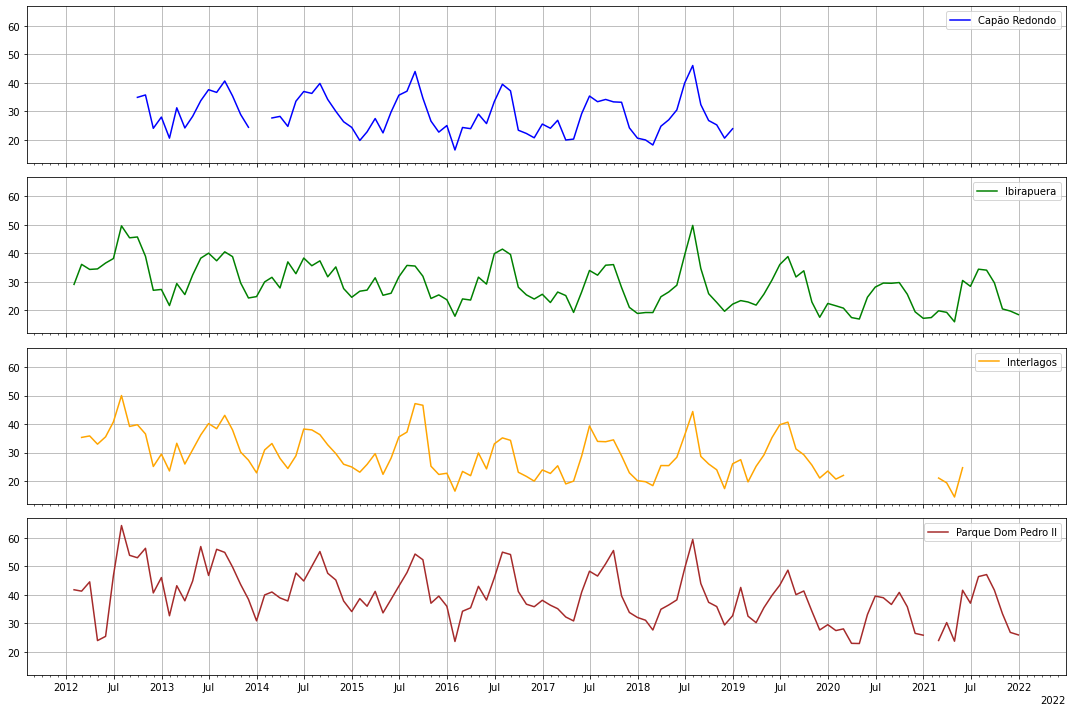

In [59]:
x_cp_month = cp_month['data_hora']
x_ib_month = ib_month['data_hora']
x_inter_month = inter_month['data_hora']
x_pq_month = pq_month['data_hora']

y_cp_month_no2 = cp_month['NO2']
y_ib_month_no2 = ib_month['NO2']
y_inter_month_no2 = inter_month['NO2']
y_pq_month_no2 = pq_month['NO2']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

####

ax1.plot(x_cp_month, y_cp_month_no2, label='Capão Redondo', color='blue')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x_ib_month, y_ib_month_no2, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x_inter_month, y_inter_month_no2, label='Interlagos', color='orange')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x_pq_month, y_pq_month_no2, label='Parque Dom Pedro II', color='brown')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax4.set_xlabel('')

plt.tight_layout()
plt.show()

##Annual Mean Concentration

###O3

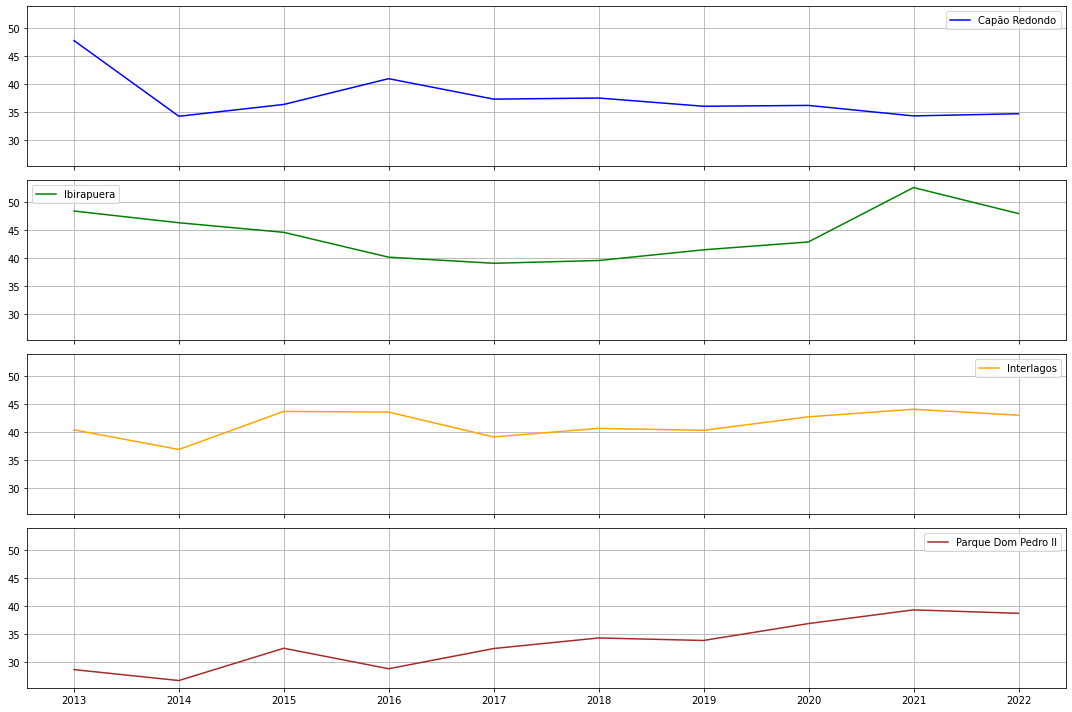

In [61]:
x_cp_year = cp_year['data_hora']
x_ib_year = ib_year['data_hora']
x_inter_year = inter_year['data_hora']
x_pq_year = pq_year['data_hora']

y_cp_year_o3 = cp_year['O3']
y_ib_year_o3 = ib_year['O3']
y_inter_year_o3 = inter_year['O3']
y_pq_year_o3 = pq_year['O3']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

ax1.plot(x_cp_year, y_cp_year_o3, label='Capão Redondo', color='blue')
ax2.plot(x_ib_year, y_ib_year_o3, label='Ibirapuera', color='green')
ax3.plot(x_inter_year, y_inter_year_o3, label='Interlagos', color='orange')
ax4.plot(x_pq_year, y_pq_year_o3, label='Parque Dom Pedro II', color='brown')

ax1.legend()
ax1.set_title('')
# ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(True)

ax2.legend()
# ax2.set_title('')
# ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(True)

ax3.legend()
# ax3.set_title('')
# ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True)

ax4.legend()
# ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(True)

plt.tight_layout()
plt.show()

###NO

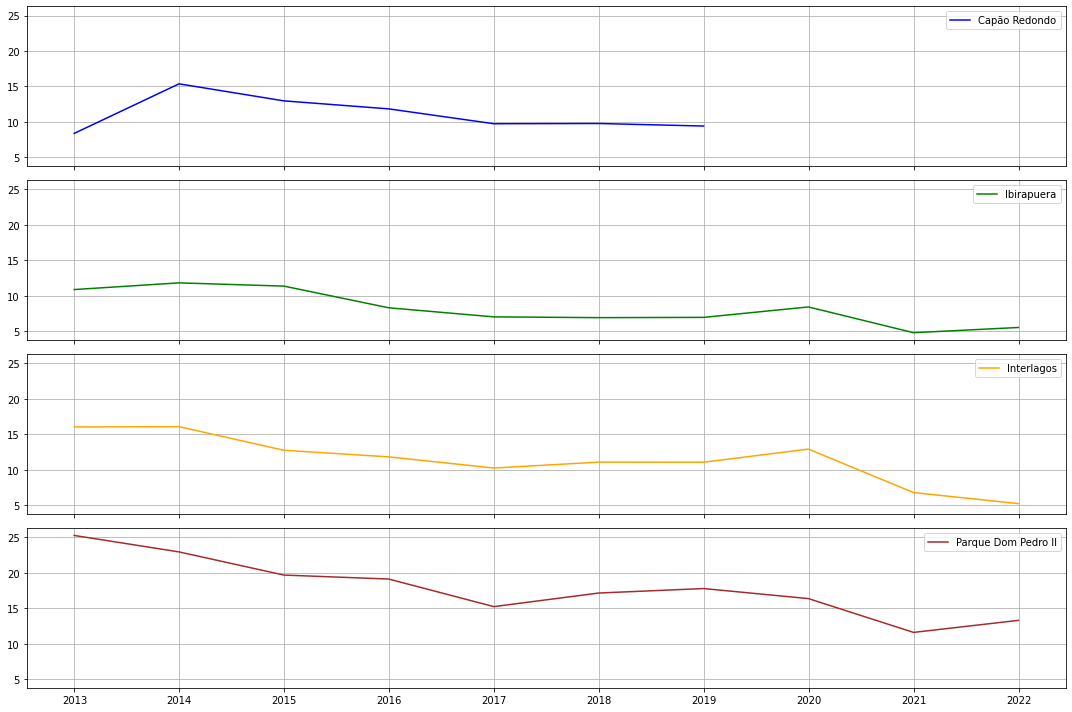

In [62]:
x_cp_year = cp_year['data_hora']
x_ib_year = ib_year['data_hora']
x_inter_year = inter_year['data_hora']
x_pq_year = pq_year['data_hora']

y_cp_year_no = cp_year['NO']
y_ib_year_no = ib_year['NO']
y_inter_year_no = inter_year['NO']
y_pq_year_no = pq_year['NO']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

ax1.plot(x_cp_year, y_cp_year_no, label='Capão Redondo', color='blue')
ax2.plot(x_ib_year, y_ib_year_no, label='Ibirapuera', color='green')
ax3.plot(x_inter_year, y_inter_year_no, label='Interlagos', color='orange')
ax4.plot(x_pq_year, y_pq_year_no, label='Parque Dom Pedro II', color='brown')

ax1.legend()
ax1.set_title('')
# ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(True)

ax2.legend()
# ax2.set_title('')
# ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(True)

ax3.legend()
# ax3.set_title('')
# ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True)

ax4.legend()
# ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(True)

plt.tight_layout()
plt.show()

###NO2

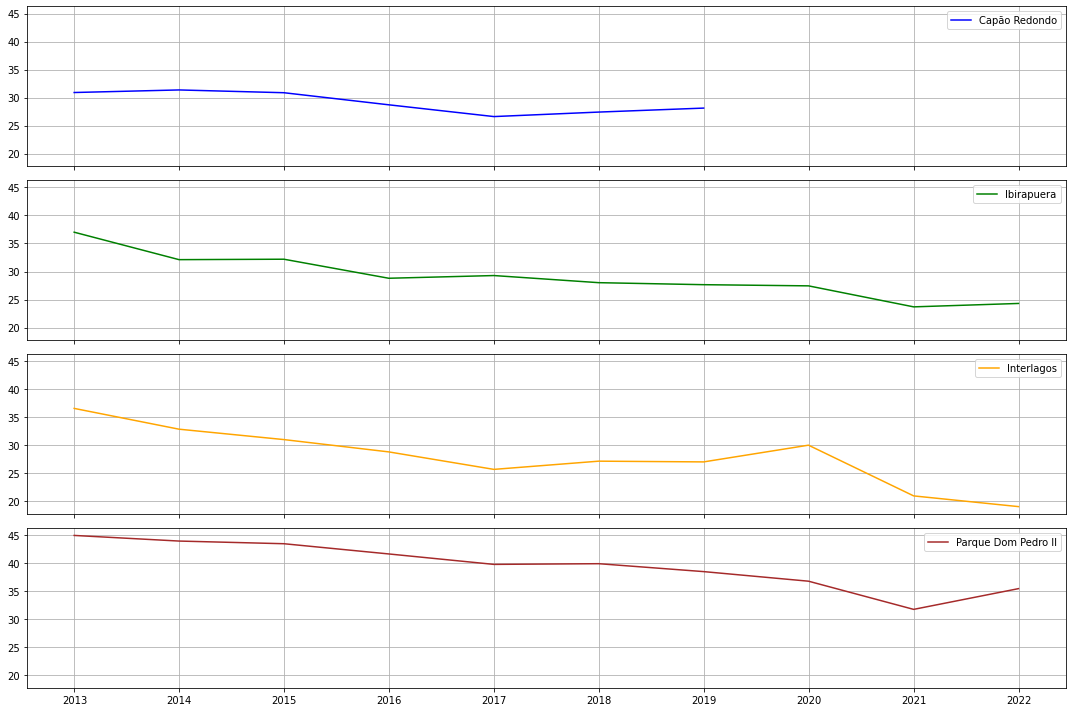

In [63]:
x_cp_year = cp_year['data_hora']
x_ib_year = ib_year['data_hora']
x_inter_year = inter_year['data_hora']
x_pq_year = pq_year['data_hora']

y_cp_year_no2 = cp_year['NO2']
y_ib_year_no2 = ib_year['NO2']
y_inter_year_no2 = inter_year['NO2']
y_pq_year_no2 = pq_year['NO2']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                         ncols=1, 
                                         sharex=True,
                                         sharey=True, 
                                         figsize=(15,10)
                                        )

ax1.plot(x_cp_year, y_cp_year_no2, label='Capão Redondo', color='blue')
ax2.plot(x_ib_year, y_ib_year_no2, label='Ibirapuera', color='green')
ax3.plot(x_inter_year, y_inter_year_no2, label='Interlagos', color='orange')
ax4.plot(x_pq_year, y_pq_year_no2, label='Parque Dom Pedro II', color='brown')

ax1.legend()
ax1.set_title('')
# ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(True)

ax2.legend()
# ax2.set_title('')
# ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(True)

ax3.legend()
# ax3.set_title('')
# ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True)

ax4.legend()
# ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(True)

plt.tight_layout()
plt.show()

##Heatmap

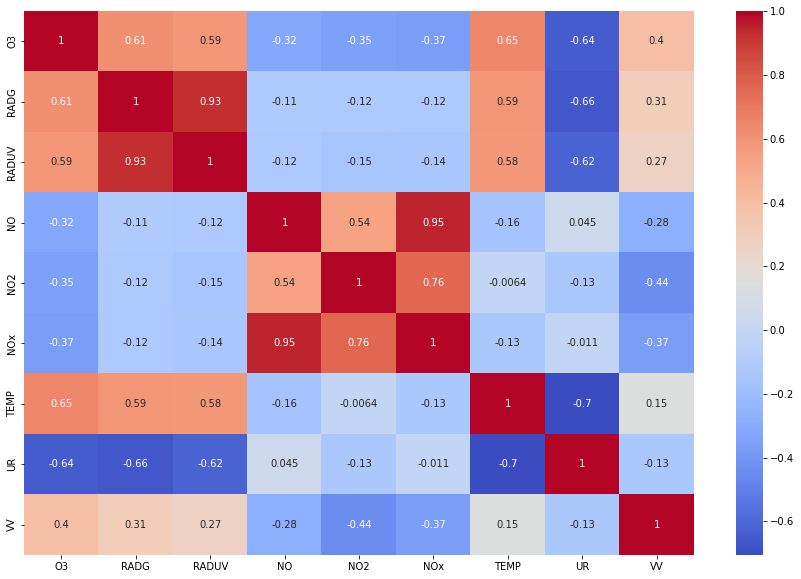

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),
            cmap='coolwarm',
            annot=True
            );

#Linear Regression

#Cluster Analysis